In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier


In [47]:
df = pd.read_csv("avocado.csv")

In [48]:
df.head()

,S.no,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20/12/15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13/12/15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06/12/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29/11/15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [49]:
df.tail()

,S.no,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,04/02/18,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28/01/18,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21/01/18,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14/01/18,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,07/01/18,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [50]:
df.shape

(18249, 14)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   S.no          18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [52]:
df.columns

Index(['S.no', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [53]:
df.isnull().sum()

S.no            0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

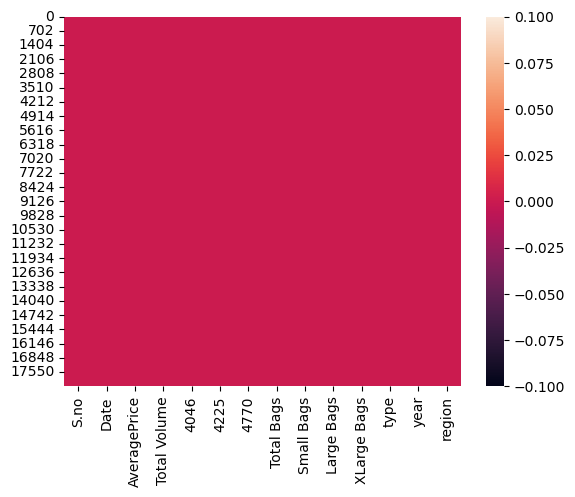

In [54]:
sns.heatmap(df.isnull())

In [55]:
df.describe()

,S.no,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


<AxesSubplot:>

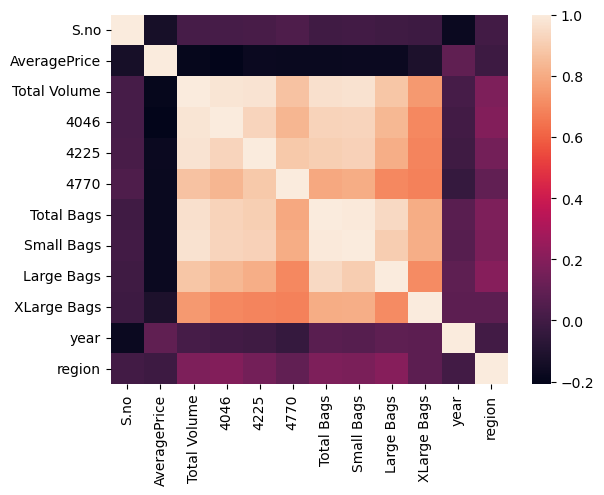

In [63]:
sns.heatmap(df.corr())

In [58]:
le=LabelEncoder()
df['region']=le.fit_transform(df['region'])

df

,S.no,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0
1,1,20/12/15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0
2,2,13/12/15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0
3,3,06/12/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0
4,4,29/11/15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04/02/18,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,53
18245,8,28/01/18,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,53
18246,9,21/01/18,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,53
18247,10,14/01/18,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,53


In [61]:
x_cls = df.drop(columns=['Date', 'Total Bags','Small Bags','Large Bags','XLarge Bags','type','S.no','region'])
y_cls = df['region']

In [62]:
x_train_cls,x_test_cls,y_train_cls,y_test_cls=train_test_split(x_cls,y_cls,test_size=0.2,random_state=42)

In [65]:
#Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train_cls, y_train_cls)

MultinomialNB()

In [66]:
nb_accuracy = nb_classifier.score(x_test_cls, y_test_cls)
print("Naive Bayes Classifier Accuracy:", nb_accuracy)

Naive Bayes Classifier Accuracy: 0.19863013698630136


In [67]:
#Nearest Neighbors Classification
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train_cls, y_train_cls)

KNeighborsClassifier()

In [68]:
knn_accuracy = knn_classifier.score(x_test_cls, y_test_cls)
print("K Nearest Neighbors Classifier Accuracy:", knn_accuracy)

K Nearest Neighbors Classifier Accuracy: 0.5635616438356165


C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [70]:
#Decision Tree Classification
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train_cls, y_train_cls)


DecisionTreeClassifier()

In [71]:
dt_accuracy = dt_classifier.score(x_test_cls, y_test_cls)
print("Decision Tree Classifier Accuracy:", dt_accuracy)


Decision Tree Classifier Accuracy: 0.7284931506849315


In [84]:
#Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(x_train_cls, y_train_cls)


SVC()

In [74]:
svm_accuracy = svm_classifier.score(x_test_cls, y_test_cls)
print("Support Vector Machine Classifier Accuracy:", svm_accuracy)

Support Vector Machine Classifier Accuracy: 0.15041095890410958


In [75]:
print("Naive Bayes Classifier Accuracy:", nb_accuracy)
print("K Nearest Neighbors Classifier Accuracy:", knn_accuracy)
print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Support Vector Machine Classifier Accuracy:", svm_accuracy)

Naive Bayes Classifier Accuracy: 0.19863013698630136
K Nearest Neighbors Classifier Accuracy: 0.5635616438356165
Decision Tree Classifier Accuracy: 0.7284931506849315
Support Vector Machine Classifier Accuracy: 0.15041095890410958


In [80]:
model = LinearRegression()
model.fit(x_train_cls, y_train_cls)

LinearRegression()

In [149]:
y_pred_cls = model.predict(x_test_cls)

In [106]:
print('MAE:', metrics.mean_absolute_error(y_test_cls, y_pred_reg))
print('MSE:', metrics.mean_squared_error(y_test_cls, y_pred_reg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_cls, y_pred_reg)))

MAE: 13.096588083729753
MSE: 229.59846585346253
RMSE: 15.152506916463114


In [144]:
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])

df

,S.no,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,20/12/15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,13/12/15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,06/12/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,29/11/15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04/02/18,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,8,28/01/18,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,9,21/01/18,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,10,14/01/18,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [145]:
x_reg = df[['Total Volume', '4046', '4225', '4770', 'type', 'year']]
y_reg = df['AveragePrice']

In [146]:
x_reg

,Total Volume,4046,4225,4770,type,year
0,64236.62,1036.74,54454.85,48.16,0,2015
1,54876.98,674.28,44638.81,58.33,0,2015
2,118220.22,794.70,109149.67,130.50,0,2015
3,78992.15,1132.00,71976.41,72.58,0,2015
4,51039.60,941.48,43838.39,75.78,0,2015
...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,1,2018
18245,13888.04,1191.70,3431.50,0.00,1,2018
18246,13766.76,1191.92,2452.79,727.94,1,2018
18247,16205.22,1527.63,2981.04,727.01,1,2018


In [135]:
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])

df

,S.no,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,20/12/15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,13/12/15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,06/12/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,29/11/15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04/02/18,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,8,28/01/18,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,9,21/01/18,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,10,14/01/18,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [159]:
x_train_regg,x_test_regg,y_train_regg,y_test_regg,=train_test_split(x_reg,y_reg,test_size=0.2,random_state=42)

In [160]:
reg = LinearRegression()
reg.fit(x_train_regg, y_train_regg)

LinearRegression()

In [161]:
y_pred_regg = reg.predict(x_test_regg)

In [162]:
print('MAE:', metrics.mean_absolute_error(y_test_regg, y_pred_regg))
print('MSE:', metrics.mean_squared_error(y_test_regg, y_pred_regg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_regg, y_pred_regg)))

MAE: 0.24189611859846685
MSE: 0.09817743885177552
RMSE: 0.31333279249350127
